In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
df=pd.read_csv("/content/Data_Train.csv")

In [47]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [49]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [50]:
# Check for null values
print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [51]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})
# Dropping rows with missing values in 'Route'
df = df.dropna()

In [52]:
# Check for null values
print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [53]:
# Convert 'Date_of_Journey' to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
# Extract day, month, and year from 'Date_of_Journey'
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year
#Dropping Date_of_Journey column
#df.drop('Date_of_Journey',axis=1,inplace=True)
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,2019


In [54]:
df['Route']=df['Route'].str.replace('?','->')
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR -> DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL -> LKO -> BOM -> COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,2019


In [55]:
# Extract hour and minute from 'Dep_Time'
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.minute


In [56]:
# Drop the original 'Dep_Time' column as it's no longer needed
df = df.drop('Dep_Time', axis=1)
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR -> DEL,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,13:15,7h 25m,2,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL -> LKO -> BOM -> COK,04:25 10 Jun,19h,2,No info,13882,9,6,2019,9,25


In [57]:
# Handle mixed formats in 'Arrival_Time'
def parse_arrival_time(time_str):
    try:
        # Try parsing with datetime first
        dt = pd.to_datetime(time_str, errors='coerce')
        if pd.notnull(dt):
            return dt.hour, dt.minute
        # If that fails, try parsing just time
        dt = pd.to_datetime(time_str, format='%H:%M', errors='coerce')
        return dt.hour, dt.minute
    except Exception:
        return None, None


In [58]:
# Apply the function and create new columns
df[['Arrival_Hour', 'Arrival_Minute']] = df['Arrival_Time'].apply(lambda x: pd.Series(parse_arrival_time(x)))

# Drop the original 'Arrival_Time' column as it's no longer needed
df = df.drop('Arrival_Time', axis=1)

In [59]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR -> DEL,2h 50m,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,7h 25m,2,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL -> LKO -> BOM -> COK,19h,2,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU -> NAG -> BLR,5h 25m,1,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR -> NAG -> DEL,4h 45m,1,No info,13302,1,3,2019,16,50,21,35


In [60]:
# Process 'Duration' column
def parse_duration(duration):
    hours = 0
    minutes = 0

    # Extract hours
    hour_match = re.search(r'(\d+)h', duration)
    if hour_match:
        hours = int(hour_match.group(1))

    # Extract minutes
    minute_match = re.search(r'(\d+)m', duration)
    if minute_match:
        minutes = int(minute_match.group(1))

    return hours, minutes

# Apply the function to create new columns
df[['Duration_Hours', 'Duration_Minutes']] = df['Duration'].apply(lambda x: pd.Series(parse_duration(x)))

In [61]:
# Drop the original 'Duration' column as it's no longer needed
df = df.drop('Duration', axis=1)


In [62]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR -> DEL,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,2,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL -> LKO -> BOM -> COK,2,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU -> NAG -> BLR,1,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR -> NAG -> DEL,1,No info,13302,1,3,2019,16,50,21,35,4,45


In [63]:
df.describe()

,Date_of_Journey,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
count,10682,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,2019-05-04 19:56:32.398427392,0.824190,9087.214567,13.509081,4.708575,2019.0,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
min,2019-03-01 00:00:00,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-03-27 00:00:00,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,2019-05-15 00:00:00,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,2019-06-06 00:00:00,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,2019-06-27 00:00:00,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000
std,NaN,0.675229,4611.548810,8.479363,1.164408,0.0,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817


In [64]:
df.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours', 'Duration_Minutes'],
      dtype='object')

In [65]:
sns.set(style="whitegrid")


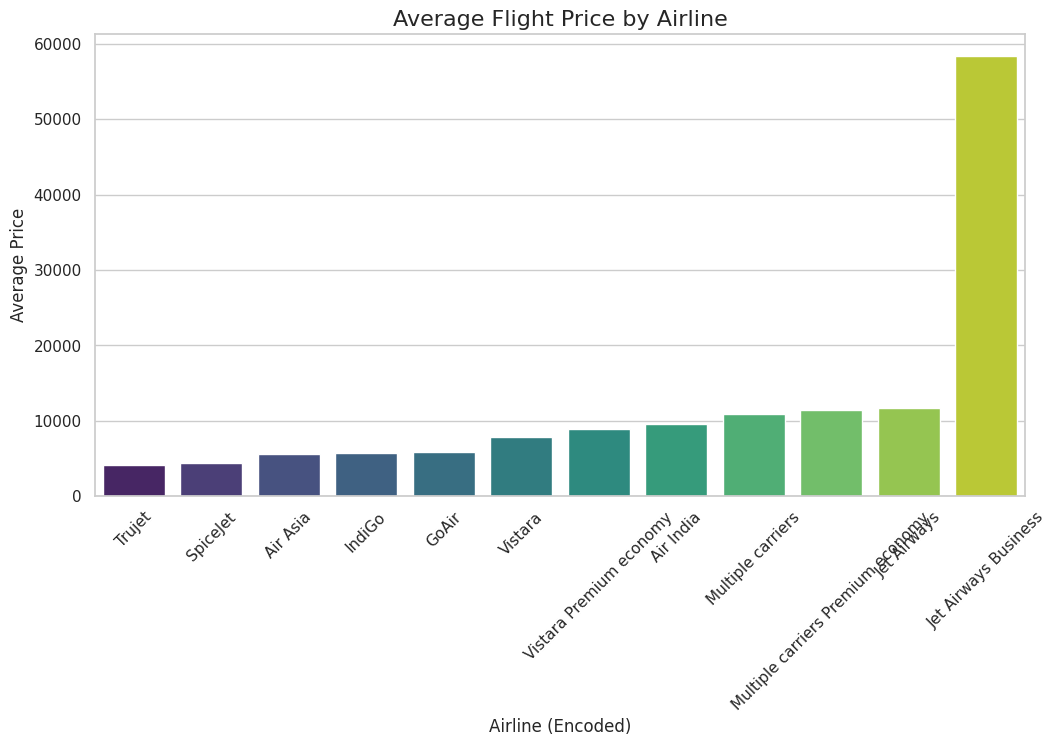

In [66]:
# 1. Airline vs. Average Price
plt.figure(figsize=(12, 6))
airline_avg_price = df.groupby('Airline')['Price'].mean().sort_values()
sns.barplot(x=airline_avg_price.index, y=airline_avg_price.values, hue=airline_avg_price.index, dodge=False, palette='viridis', legend=False)
plt.title('Average Flight Price by Airline', fontsize=16)
plt.xlabel('Airline (Encoded)', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()


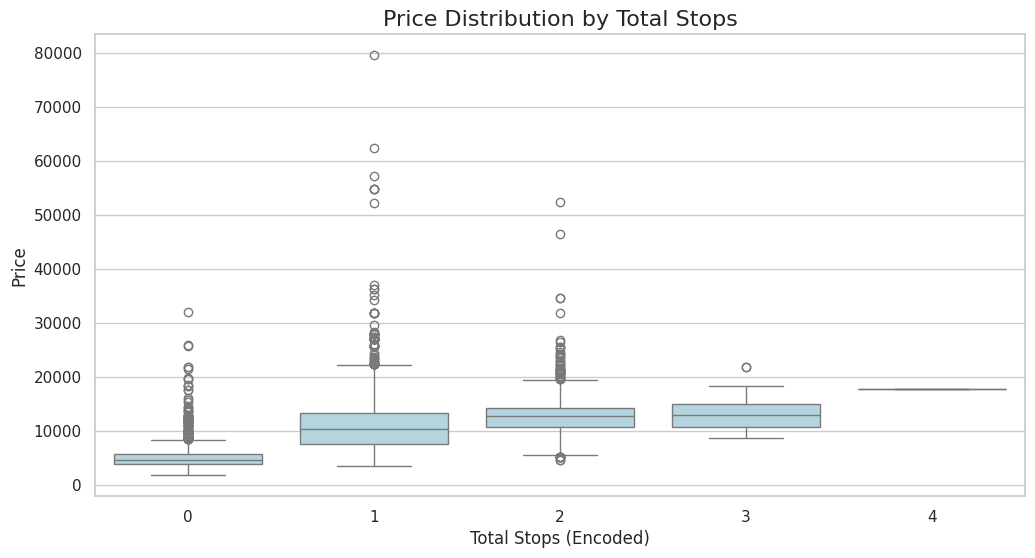

In [67]:
# 2. Price vs. Total Stops
plt.figure(figsize=(12, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df, color='lightblue')
plt.title('Price Distribution by Total Stops', fontsize=16)
plt.xlabel('Total Stops (Encoded)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

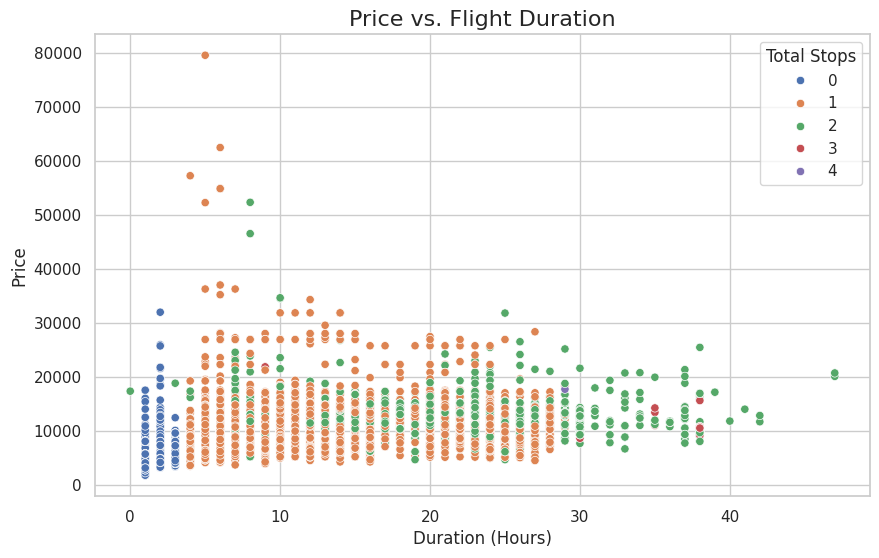

In [68]:
# 3. Price vs. Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_Hours', y='Price', data=df, hue='Total_Stops', palette='deep')  # hue specified
plt.title('Price vs. Flight Duration', fontsize=16)
plt.xlabel('Duration (Hours)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Total Stops')
plt.show()


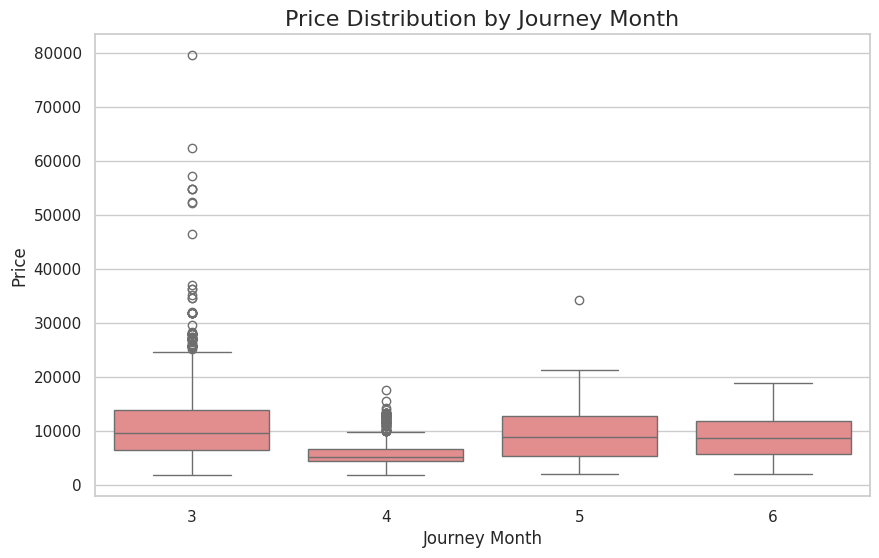

In [69]:
# 4. Price vs. Journey Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Journey_Month', y='Price', data=df, color='lightcoral')
plt.title('Price Distribution by Journey Month', fontsize=16)
plt.xlabel('Journey Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()


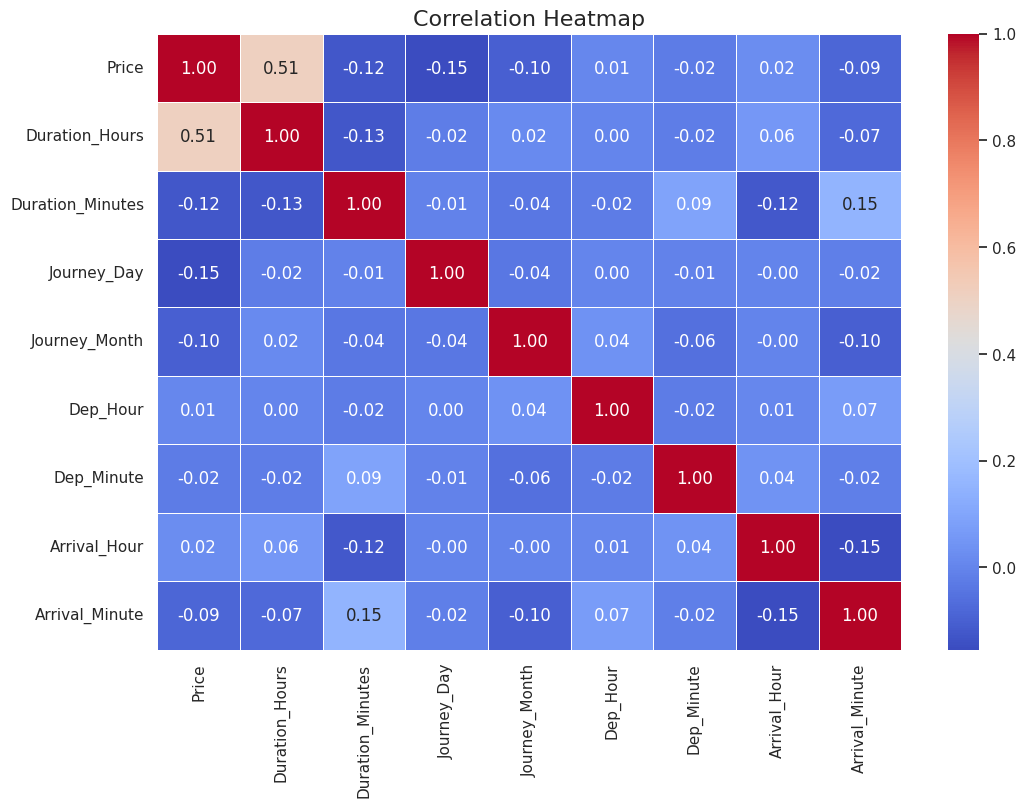

In [70]:
# 5. Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Price', 'Duration_Hours', 'Duration_Minutes', 'Journey_Day', 'Journey_Month',
                                   'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

<Axes: ylabel='count'>

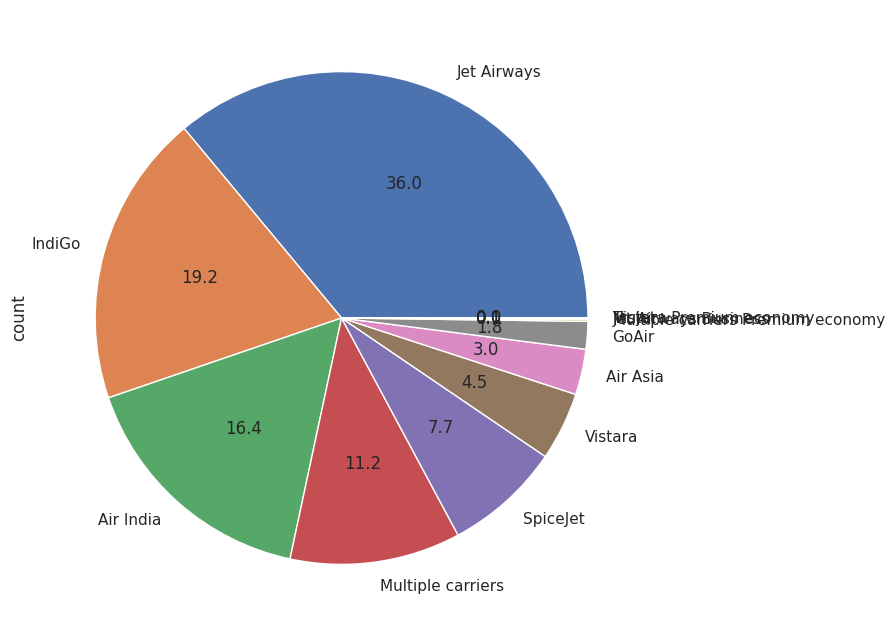

In [71]:
#6. Distribution of Airlines
df['Airline'].value_counts().plot.pie(y=df['Airline'],figsize=(10,8),autopct='%1.1f')

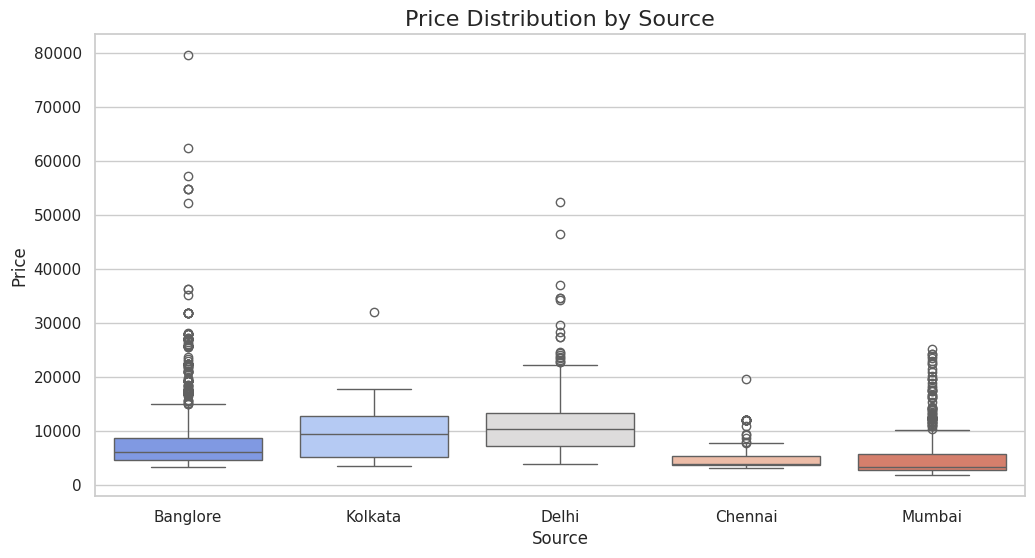

In [72]:
# 7. Price vs Source (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Source', y='Price', data=df, palette='coolwarm', hue='Source')
plt.title('Price Distribution by Source', fontsize=16)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()


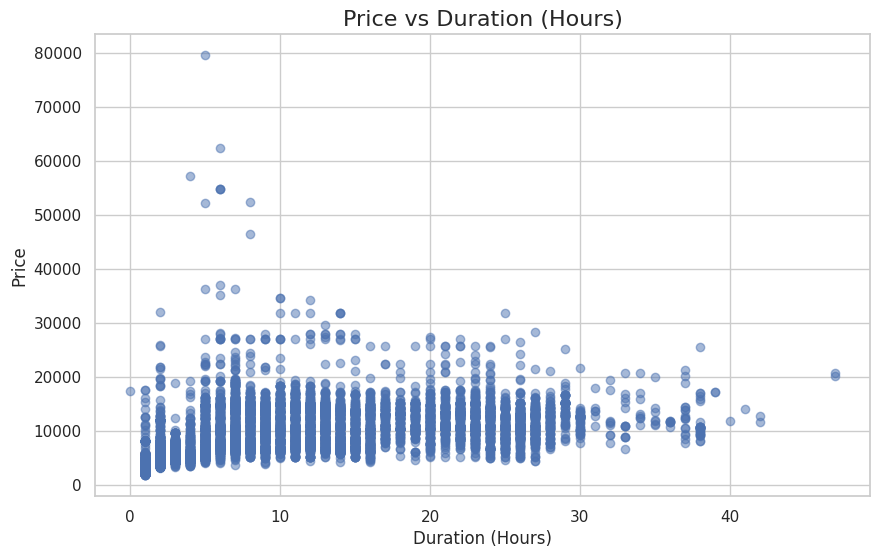

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration_Hours'], df['Price'], alpha=0.5, color='b')
plt.title('Price vs Duration (Hours)', fontsize=16)
plt.xlabel('Duration (Hours)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

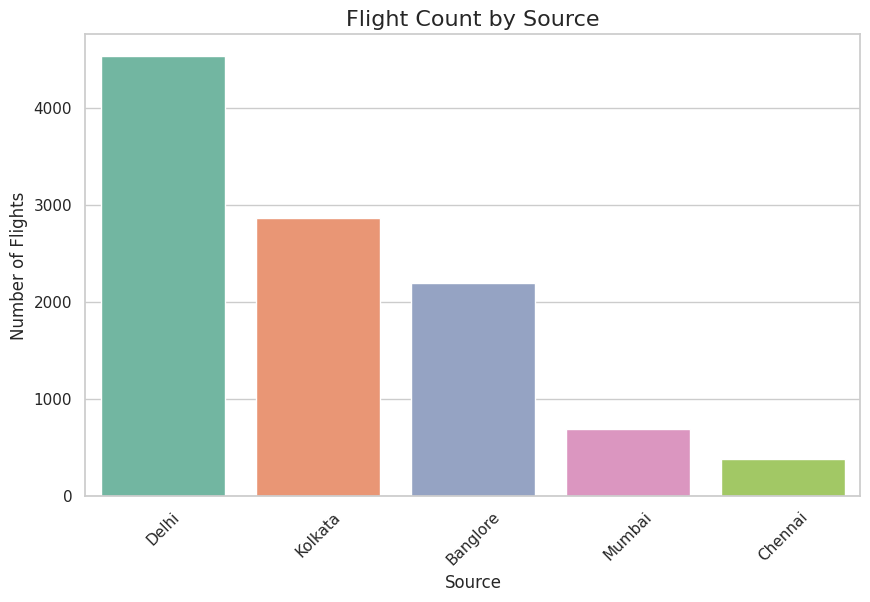

In [74]:
#8. Count the number of flights by Source
source_counts = df['Source'].value_counts()

# Plot the bar chart for Source distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, hue=source_counts.index, palette='Set2', legend=False)
plt.title('Flight Count by Source', fontsize=16)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=45)
plt.show()


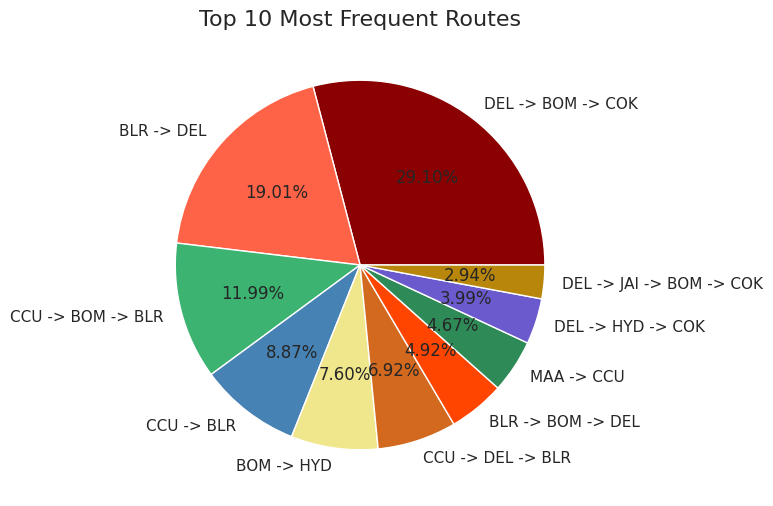

In [75]:
#9. Limit the routes to the top 10 most frequent ones
top_routes = df['Route'].value_counts()[:10]

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_routes, labels=top_routes.index, autopct='%1.2f%%', labeldistance=1.1, colors=['#8b0000', '#ff6347', '#3cb371', '#4682b4', '#f0e68c', '#d2691e', '#ff4500', '#2e8b57', '#6a5acd', '#b8860b'])
plt.title('Top 10 Most Frequent Routes', fontsize=16)
plt.show()

In [102]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix


In [103]:
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':
        df[col] = df[col].apply(lambda x: x.timestamp() if not pd.isnull(x) else np.nan)

if not all(df.dtypes.apply(lambda x: x in [int, float])):
    data_encoded = pd.get_dummies(df, drop_first=True)

In [104]:
# Split the data into features and target variable
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

In [107]:
print("Linear Regression Results:")
print(f"MSE: {lr_mse}")
print(f"R2 Score: {lr_r2}")

Linear Regression Results:
MSE: 5202075.212325166
R2 Score: 0.7587393737351535


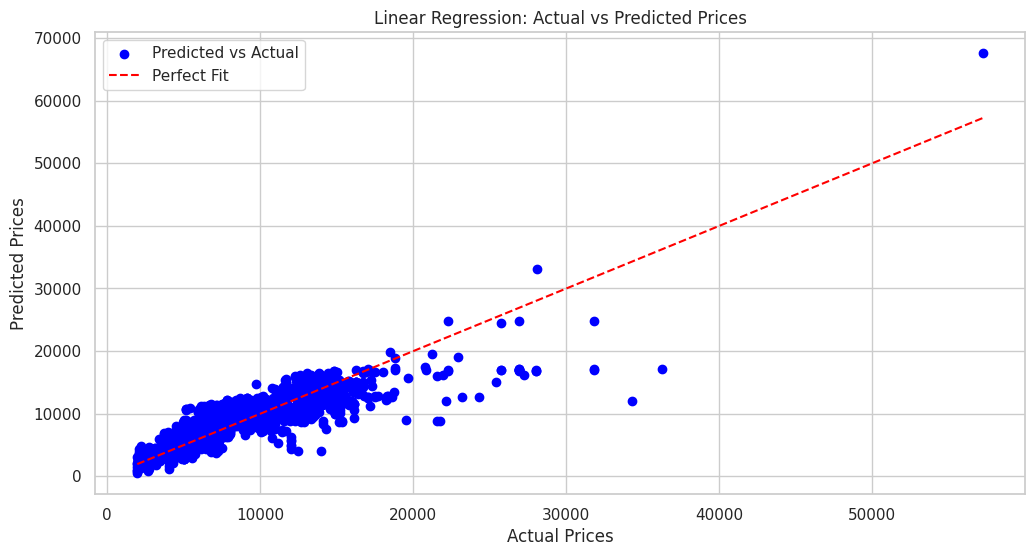

In [108]:
# Plot Linear Regression Results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, lr_predictions, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [112]:
# Save Linear Regression model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

In [113]:
# Logistic Regression (for classification - binning the prices into categories)
bins = [0, 5000, 10000, 15000, 20000, max(y)]
labels = [1, 2, 3, 4, 5]
y_binned = pd.cut(y, bins=bins, labels=labels)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binned, test_size=0.2, random_state=42)

In [114]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_bin, y_train_bin)
log_reg_predictions = log_reg_model.predict(X_test_bin)
log_reg_accuracy = accuracy_score(y_test_bin, log_reg_predictions)

In [115]:
print("\nLogistic Regression Results:")
print(f"Accuracy: {log_reg_accuracy}")


Logistic Regression Results:
Accuracy: 0.35563874590547495


In [116]:
# Save Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(log_reg_model, file)

In [117]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [118]:

print("\nDecision Tree Results:")
print(f"MSE: {dt_mse}")
print(f"R2 Score: {dt_r2}")


Decision Tree Results:
MSE: 3207398.301136068
R2 Score: 0.8512480325198875


In [119]:
# Decision Tree: Confusion Matrix and Classification Report
dt_classification_report = classification_report(y_test_bin, pd.cut(dt_predictions, bins=bins, labels=labels))
dt_confusion_matrix = confusion_matrix(y_test_bin, pd.cut(dt_predictions, bins=bins, labels=labels))
print("\nDecision Tree Classification Report:")
print(dt_classification_report)
print("\nDecision Tree Confusion Matrix:")
print(dt_confusion_matrix)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.91      0.92       486
           2       0.88      0.89      0.88       760
           3       0.90      0.92      0.91       719
           4       0.86      0.84      0.85       135
           5       0.88      0.81      0.85        37

    accuracy                           0.90      2137
   macro avg       0.89      0.87      0.88      2137
weighted avg       0.90      0.90      0.90      2137


Decision Tree Confusion Matrix:
[[441  45   0   0   0]
 [ 27 673  59   1   0]
 [  0  41 663  14   1]
 [  0   4  15 113   3]
 [  0   1   3   3  30]]


In [128]:
# Save Decision Tree model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

In [122]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [123]:
print("\nRandom Forest Results:")
print(f"MSE: {rf_mse}")
print(f"R2 Score: {rf_r2}")


Random Forest Results:
MSE: 2597862.412187423
R2 Score: 0.8795169452703666


In [124]:
# Random Forest: Confusion Matrix and Classification Report
rf_classification_report = classification_report(y_test_bin, pd.cut(rf_predictions, bins=bins, labels=labels))
rf_confusion_matrix = confusion_matrix(y_test_bin, pd.cut(rf_predictions, bins=bins, labels=labels))
print("\nRandom Forest Classification Report:")
print(rf_classification_report)
print("\nRandom Forest Confusion Matrix:")
print(rf_confusion_matrix)


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.92      0.93       486
           2       0.90      0.90      0.90       760
           3       0.90      0.92      0.91       719
           4       0.79      0.84      0.81       135
           5       1.00      0.76      0.86        37

    accuracy                           0.91      2137
   macro avg       0.91      0.87      0.88      2137
weighted avg       0.91      0.91      0.91      2137


Random Forest Confusion Matrix:
[[445  41   0   0   0]
 [ 21 687  51   1   0]
 [  0  33 663  23   0]
 [  0   1  21 113   0]
 [  0   1   2   6  28]]


In [125]:
# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [126]:
# Predict with saved model
with open('linear_regression_model.pkl', 'rb') as file:
    saved_lr_model = pickle.load(file)

new_data = X_test.iloc[:5]  # Example: using a subset of test data
predicted_prices = saved_lr_model.predict(new_data)

print("\nPredicted Prices using Saved Linear Regression Model:")
print(predicted_prices)


Predicted Prices using Saved Linear Regression Model:
[13145.95277759  8621.06097143  9823.92449164  4163.00930814
 10416.70128043]
